###**Objective of Data Collection:**
Collecting this data aims to help predict the likelihood of heart disease in patients by analyzing key health factors like age, cholesterol levels, blood pressure, and symptoms experienced during exercise. By gathering this information, the aim is to identify individuals at risk early on, so that preventive measures and treatments can be provided promptly. This data can be used for classification to build models that assist healthcare providers in making better decisions, as well as for clustering to discover patterns and subgroups within the patient population. Ultimately, this improves patient outcomes and reduces the number of heart-related deaths.

###**The source of dataset:**
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [1]:
import pandas as pd 
df = pd.read_csv('heart.csv')
print ("Datset Information:")
print(df.info())

Datset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [13]:
data = pd.read_csv('heart.csv')
num_attributes = data.shape[1]
num_object = data.shape[0]
attribute_types = data.dtypes.to_frame( name = 'Data Types')
class_name = data.columns[-1]
class_label = data.columns[-1]

print(f"\033[1mGeneral iformation:\n")
print(f"\033[1mNumber of attributes:\033[0m {num_attributes}\n")
print(f"\033[1mNumber of objects:\033[0m {num_object}\n")
print(f"\033[1mClass lable:\033[0m {class_label}\n")
print(f"\033[1mAttribute types:\033[0m")
print(attribute_types)


General iformation:

Number of attributes: 12

Number of objects: 918

Class lable: HeartDisease

Attribute types:
               Data Types
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64


In [55]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


###**Show the Min, 1st Qu, Median, Mean, 3rd Qu, Max, Standard Deviation for Each Numeric Column:**

In [57]:
# Descriptive statistics: mean, median, std, etc.
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**Age:** Patients’ ages range from 28 to 77, with a median of 54 and a mean of 53.5, indicating a middle-aged population. Most patients are in the middle-aged to elderly range, as 50% of the patients are aged 54 or older, while 25% are younger than 47.

**RestingBP:** The values have a mean of 132.4 and a median of 130. The interquartile range is 120 to 140, showing that most patients have normal blood pressure levels. However, a minimum value of 0 suggests data errors, which will be handled later.

**Cholesterol:** The majority of patients (IQR: 173 to 267) fall within normal (<200) to borderline high (>240) cholesterol levels. However, a minimum value of 0 suggests data errors, which will be handled later.

**FastingBS:** Most patients (76.7%) have normal fasting blood sugar levels (0), while a small portion (23.3%) have elevated levels (1).

**MaxHR:** Maximum heart rates vary between 60 and 202, with a median of 138, indicating diverse cardiovascular performance.

**Oldpeak:** The IQR (0 to 1.5) means most patients experience mild to moderate ST depression during exercise, which is a common indicator of ischemia (reduced blood flow due to a blockage or narrowing of blood vessels) or heart disease.

**HeartDisease:** The target variable indicates that 55.3% of patients have heart disease, while 44.7% do not, showing a relatively balanced distribution with a slight majority having heart disease.

###**Data Preprocessing**
**Missing Values**
The dataset contains 0 missing value.

In [59]:
# Checking for missing values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

###**Data Representation:** 
Visualizing the Relationship Between Heart Disease and Key Attributes

Graphical representations are essential for exploring the connections between heart disease and various factors. The "HeartDisease" label, which categorizes individuals as either having or not having heart disease, serves as the main target variable. By examining how this label correlates with other attributes in the dataset, we can uncover valuable insights about the relationship between these factors and the likelihood of developing heart disease. Visual analysis can also highlight trends, such as the potential influence of gender and age—whether men are more susceptible to heart disease than women, and how age might be positively or negatively associated with its onset. Such visualizations play a key role in identifying significant risk factors and potential early warning signs, aiding in the early detection and diagnosis of heart disease.

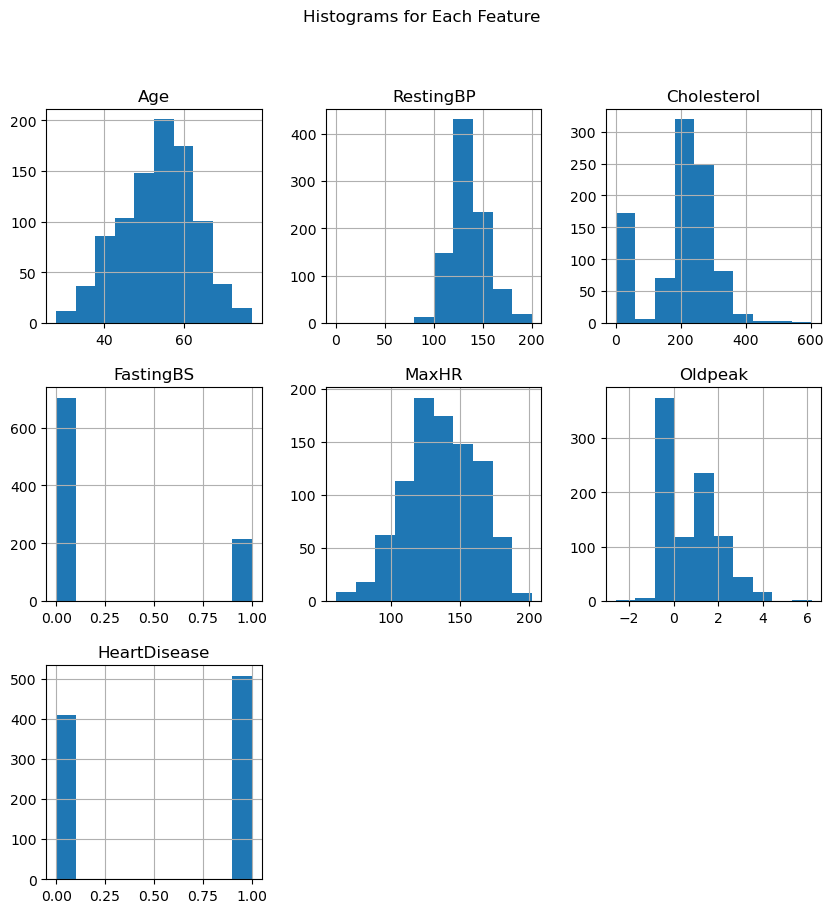

In [61]:
# Plotting histograms for all numeric columns
import matplotlib.pyplot as plt

df.hist(figsize=(10, 10))
plt.suptitle('Histograms for Each Feature')
plt.show()


**Age Distribution:** The age distribution shows a relatively balanced spread, with a slight skew towards the middle-aged group, highlighting a predominance of middle-aged patients. The histogram reveals a concentration of patients around 50 years old, with fewer patients at both extremes (younger and older patients).

**Resting Blood Pressure (RestingBP):** The histogram for resting blood pressure shows that most patients have a resting BP between 120 and 140, indicating that a majority of the population has normal blood pressure. However, there are outliers with higher values.

**Cholesterol Distribution:** The cholesterol levels in the dataset show a majority of patients falling between 150 and 250, with very few patients exhibiting extreme cholesterol values. Most patients fall within the normal to borderline high cholesterol range.

**Max Heart Rate (MaxHR):** The histogram for maximum heart rate indicates that most individuals have a max heart rate between 120 and 160, which is typical for a normal cardiovascular response to exercise. There are fewer individuals with extreme values at the higher and lower ends.

###**pairplot**

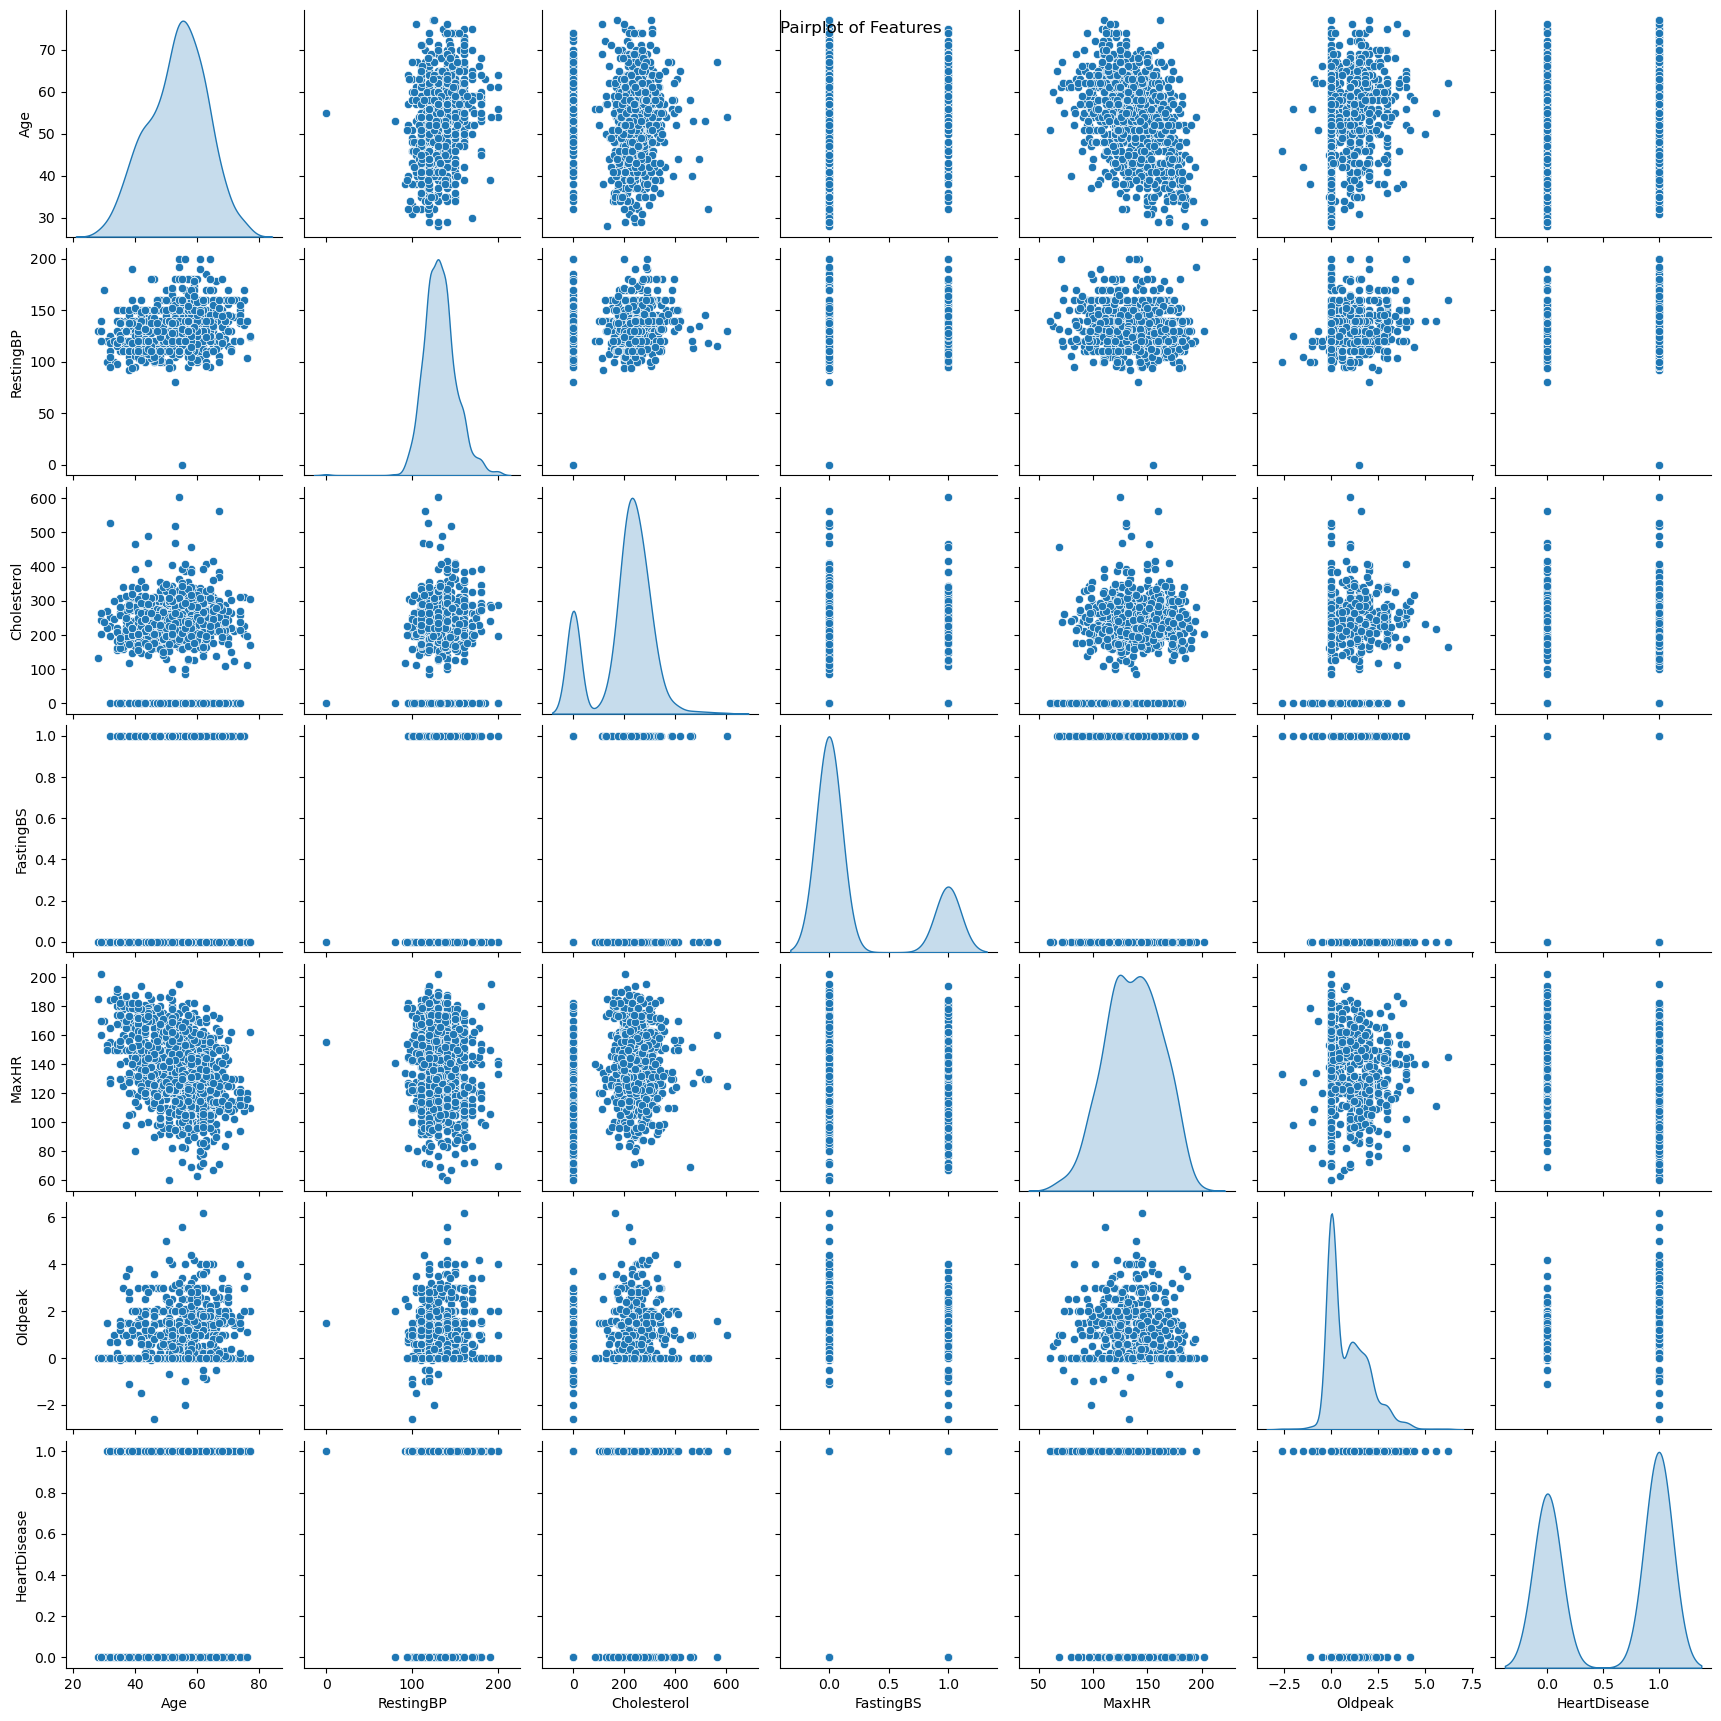

In [63]:
# Plotting a pairplot to visualize relationships between features
import seaborn as sns

sns.pairplot(df, diag_kind="kde")
plt.suptitle('Pairplot of Features')
plt.show()


This pairplot visualization provides an overview of the relationships between the various features in the heart disease dataset. By plotting each pair of features against each other, the pairplot helps to reveal potential correlations and patterns between the variables, while the diagonal histograms (or KDE plots) show the distribution of individual features.

The scatter plots in the lower triangle of the matrix display the relationships between pairs of features, while the diagonal density plots help assess the distribution of each feature. These visualizations are useful for identifying trends, potential clusters, and associations between different features that could be important for predicting heart disease.

###**bar charts**

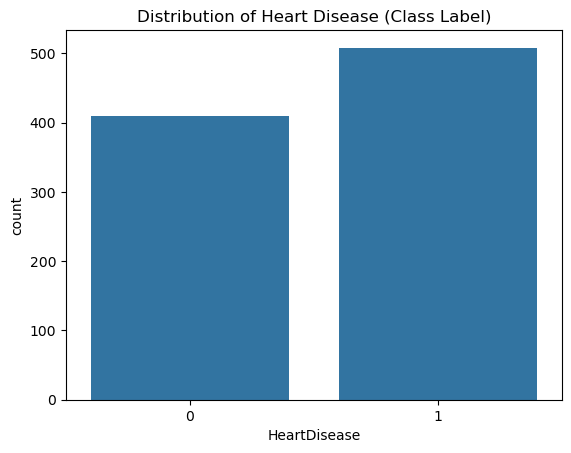

In [65]:
# Plotting a barplot for categorical data (e.g., class label)
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribution of Heart Disease (Class Label)')
plt.show()


This graph displays a count plot representing the distribution of individuals with and without heart disease in the dataset. The plot indicates that a slightly higher number of individuals are diagnosed with heart disease, as reflected by the distribution of the HeartDisease class label.

The majority of the individuals in the dataset are either classified as having or not having heart disease, which is key to understanding the prevalence of this condition within the dataset. The findings suggest that heart disease is fairly common, and this distribution could offer valuable insights for analyzing the characteristics of individuals affected by heart disease in future modeling or predictive analyses.

###**scatter plot**

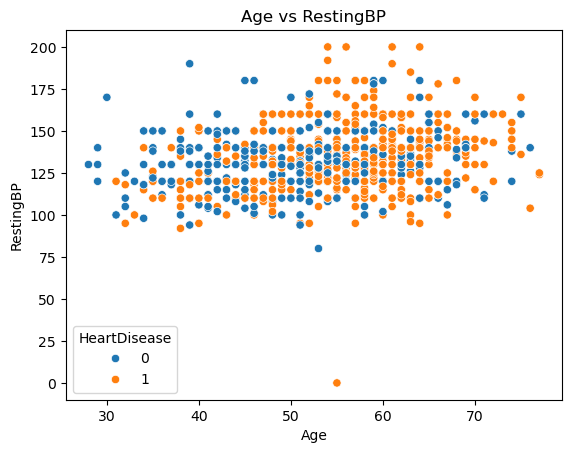

In [67]:
# Scatter plot for two continuous features (example: Age vs. RestingBP)
sns.scatterplot(x='Age', y='RestingBP', data=df, hue='HeartDisease')
plt.title('Age vs RestingBP')
plt.show()


1. MaxHR and FastingBS are significant factors for predicting heart disease across all age groups. Patients diagnosed with heart disease tend to have lower MaxHR values, while elevated FastingBS (Fasting Blood Sugar) levels are commonly observed in those with the disease.

2. Cholesterol and RestingBP become increasingly relevant in older age groups when identifying heart disease:

**Cholesterol:** Higher levels of cholesterol are more frequently observed in individuals over the age of 50 with heart disease. This trend is less prominent in younger age groups.

**RestingBP:** Elevated RestingBP values are more prevalent in patients with heart disease, particularly those aged between 50 and 70. As individuals age, RestingBP becomes a more critical indicator for heart disease risk.

3. Fasting Blood Sugar (FastingBS) consistently shows a strong relationship with heart disease across all age groups, regardless of other factors.